In [14]:
import os
import random
import shutil

# Dossiers d'entrée et de sortie
input_dir = "../dataset/combined_dataset_spectrograms"  # Remplace par le chemin vers ton dossier de spectrogrammes
output_dir = "../dataset/combined_dataset_spectrograms_undersampled"

# Créer le dossier de sortie s'il n'existe pas
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Dictionnaire pour compter les fichiers par classe
class_counts = {}

# Parcourir les fichiers et compter le nombre d'échantillons par classe
for file in os.listdir(input_dir):
    if file.endswith(".png"):
        class_name = file.split("_")[1]  # Supposons que le nom du fichier suit "DATASET_Emotion_id.png"
        if class_name not in class_counts:
            class_counts[class_name] = []
        class_counts[class_name].append(file)

# Trouver le nombre minimum d'échantillons parmi les classes
min_samples = min(len(files) for files in class_counts.values())

print(f"Nombre minimum d'échantillons par classe : {min_samples}")


Nombre minimum d'échantillons par classe : 1452


In [15]:
from collections import defaultdict
import random
import shutil
import os

# Rééquilibrer le dataset en tenant compte des datasets et des émotions
balanced_files = []  # Liste des fichiers sélectionnés pour l'équilibrage

for class_name, files in class_counts.items():
    # Regrouper les fichiers par dataset
    dataset_contributions = defaultdict(list)
    for file in files:
        dataset_name = file.split("_")[0]  # Extraire le nom du dataset
        dataset_contributions[dataset_name].append(file)

    # Calculer la répartition initiale des datasets pour cette émotion
    dataset_sizes = {k: len(v) for k, v in dataset_contributions.items()}
    total_files = sum(dataset_sizes.values())
    
    # Proportions cibles pour chaque dataset dans cette émotion
    dataset_proportions = {k: (v / total_files) for k, v in dataset_sizes.items()}
    
    # Nombre de fichiers à sélectionner dans cette classe
    remaining_samples = min_samples

    # Sélectionner les fichiers en tenant compte des proportions des datasets
    for dataset_name, files_in_dataset in dataset_contributions.items():
        # Calculer combien de fichiers sélectionner pour ce dataset
        target_count = int(dataset_proportions[dataset_name] * min_samples)
        # S'assurer de ne pas dépasser le nombre total de fichiers disponibles
        target_count = min(target_count, len(files_in_dataset))
        
        # Sélectionner les fichiers
        selected_files = random.sample(files_in_dataset, target_count)
        balanced_files.extend(selected_files)
        remaining_samples -= len(selected_files)

    # Si des fichiers manquent pour atteindre min_samples, compléter avec des fichiers aléatoires
    if remaining_samples > 0:
        additional_files = random.sample(files, remaining_samples)
        balanced_files.extend(additional_files)

# Copier les fichiers sélectionnés dans le dossier de sortie
for file in balanced_files:
    src_file = os.path.join(input_dir, file)
    dst_file = os.path.join(output_dir, file)
    shutil.copy(src_file, dst_file)

print("Rééquilibrage terminé. Les fichiers équilibrés sont dans :", output_dir)


Rééquilibrage terminé. Les fichiers équilibrés sont dans : ../dataset/combined_dataset_spectrograms_undersampled


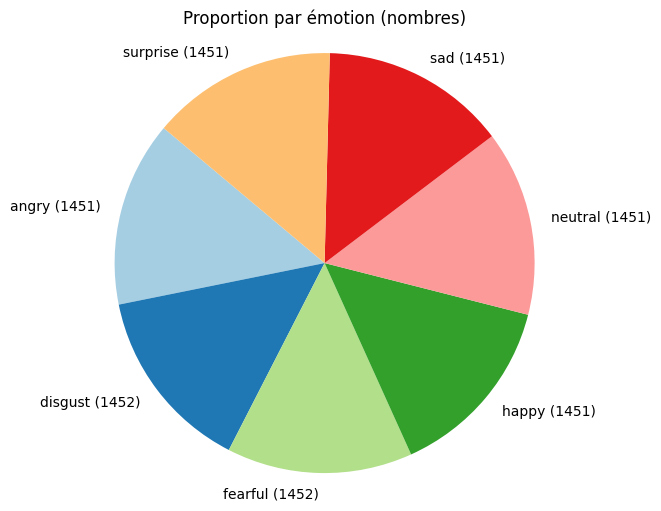

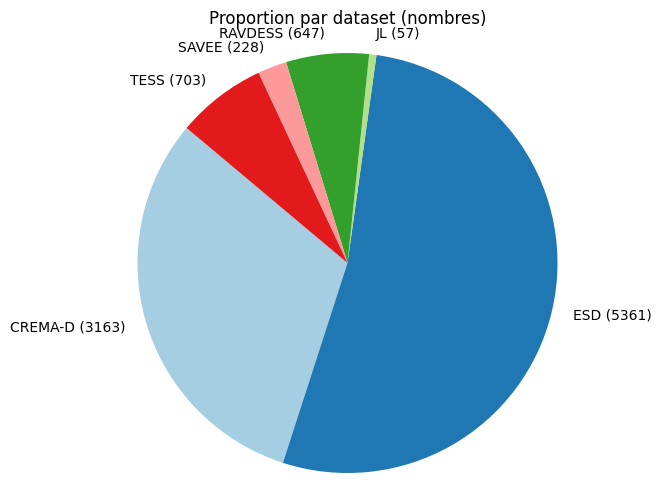

In [17]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Dossier contenant les fichiers
input_dir = output_dir

# Analyser les fichiers
emotions = []
datasets = []

for file in os.listdir(input_dir):
    if file.endswith(".png"):
        # Extraire les informations depuis le nom du fichier
        parts = file.split("_")
        if len(parts) >= 3:  # Vérifier que le format est correct
            dataset_name = parts[0]
            emotion_name = parts[1]
            datasets.append(dataset_name)
            emotions.append(emotion_name)

# Compter les proportions
emotion_counts = Counter(emotions)
dataset_counts = Counter(datasets)

# Fonction pour afficher un graphique en secteurs avec les nombres
def plot_pie_chart_with_counts(data, title, output_file):
    labels = [f"{label} ({count})" for label, count in data.items()]  # Ajouter les nombres aux labels
    sizes = data.values()
    plt.figure(figsize=(8, 6))
    plt.pie(sizes, labels=labels, startangle=140, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Assurer que le graphique est un cercle
    plt.title(title)
    plt.savefig(output_file)
    plt.show()

# Proportion des émotions
plot_pie_chart_with_counts(emotion_counts, "Proportion par émotion (nombres)", "emotion_proportion.png")

# Proportion des datasets
plot_pie_chart_with_counts(dataset_counts, "Proportion par dataset (nombres)", "dataset_proportion.png")
